<a href="https://colab.research.google.com/github/yasminsarkhosh/fyp2021p3/blob/main/FYP_project_3_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get some images and import packages

In [2]:
if True:      #A weird trick needed for Google Colab
  # Clone repository with example images 
  !rm -rf fyp2021p3
  !git clone https://github.com/vcheplygina/fyp2021p3.git


import matplotlib.pyplot as plt
import numpy as np

# Other useful packages might be skimage or PIL


Cloning into 'fyp2021p3'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 384 (delta 4), reused 3 (delta 0), pack-reused 374
Receiving objects: 100% (384/384), 855.59 MiB | 18.40 MiB/s, done.
Resolving deltas: 100% (96/96), done.
Updating files: 100% (366/366), done.


In [3]:
import pandas as pd

#read file
file_input = pd.read_csv("../fyp2021p3/data/example_ground_truth.csv")
file_input.shape

#150 images in total
#3 columns: image_id, melanoma, keratosis


(150, 3)

In [4]:
#filter out all images that are not melanoma
melanoma = file_input[file_input["melanoma"] == 1.0]

#remove column for keratosis
melanoma_df = melanoma.drop(["seborrheic_keratosis"], axis = 1)
melanoma_df

image_id  melanoma
25   ISIC_0012099       1.0
30   ISIC_0012151       1.0
42   ISIC_0012288       1.0
51   ISIC_0012434       1.0
73   ISIC_0013232       1.0
75   ISIC_0013491       1.0
76   ISIC_0013501       1.0
77   ISIC_0013518       1.0
79   ISIC_0013549       1.0
84   ISIC_0013644       1.0
85   ISIC_0013651       1.0
86   ISIC_0013663       1.0
87   ISIC_0013702       1.0
88   ISIC_0013736       1.0
90   ISIC_0013828       1.0
94   ISIC_0014037       1.0
102  ISIC_0014217       1.0
103  ISIC_0014302       1.0
106  ISIC_0014428       1.0
107  ISIC_0014558       1.0
123  ISIC_0014688       1.0
125  ISIC_0014809       1.0
127  ISIC_0014857       1.0
128  ISIC_0014931       1.0
131  ISIC_0014946       1.0
132  ISIC_0014979       1.0
133  ISIC_0014985       1.0
137  ISIC_0015124       1.0
140  ISIC_0015243       1.0
141  ISIC_0015256       1.0

In [5]:
#number of images left
melanoma.shape

(30, 3)

In [6]:
#read file features
file_features_df = pd.read_csv("../fyp2021p3/fyp2021p3/features/features.csv")
file_features_df.shape

#150 rows, 3 columns

(150, 3)

In [7]:
#data frame for features
file_features_df

id        area  perimeter
0    ISIC_0001769    216160.0     2013.0
1    ISIC_0001852    130493.0     1372.0
2    ISIC_0001871    205116.0     1720.0
3    ISIC_0003462    161705.0     1344.0
4    ISIC_0003539    317040.0     2063.0
..            ...         ...        ...
145  ISIC_0015443   9732988.0    13775.0
146  ISIC_0015445  12049938.0    19517.0
147  ISIC_0015483   8856478.0    13813.0
148  ISIC_0015496   8951522.0    13742.0
149  ISIC_0015627   3193093.0     8751.0

[150 rows x 3 columns]

In [8]:
#rename column 'id' to 'image_id'
file_features_df.rename(columns={'id': 'image_id'}, inplace=True)

#merge data frame for file_features_df with melanoma by column 'image_id'
merge_feature_melanoma = file_features_df.merge(melanoma_df, on='image_id', how='right')

In [9]:
#data frame for merged features and melanoma
#this data frame shows only data related to melanoma 

merge_feature_melanoma

image_id        area  perimeter  melanoma
0   ISIC_0012099     88455.0     1353.0       1.0
1   ISIC_0012151   1558295.0     5920.0       1.0
2   ISIC_0012288    361677.0     2885.0       1.0
3   ISIC_0012434    225711.0     2110.0       1.0
4   ISIC_0013232    467956.0     3501.0       1.0
5   ISIC_0013491    398097.0     2921.0       1.0
6   ISIC_0013501    809661.0     3059.0       1.0
7   ISIC_0013518   4680699.0    12142.0       1.0
8   ISIC_0013549    907406.0     3102.0       1.0
9   ISIC_0013644   1102493.0     3545.0       1.0
10  ISIC_0013651   4205941.0     6906.0       1.0
11  ISIC_0013663   2268716.0     8854.0       1.0
12  ISIC_0013702   1781222.0     4594.0       1.0
13  ISIC_0013736   1376523.0     5495.0       1.0
14  ISIC_0013828   1907682.0     5824.0       1.0
15  ISIC_0014037   3710908.0     7149.0       1.0
16  ISIC_0014217   4336071.0    11204.0       1.0
17  ISIC_0014302    579716.0     3900.0       1.0
18  ISIC_0014428    525860.0     3284.0       1.0
19  ISIC_0014558   2094081.0     8184.0       1.0
20  ISIC_0014688  24353712.0    25900.0       1.0
21  ISIC_0014809   4795895.0    10591.0       1.0
22  ISIC_0014857  18293678.0    14814.0       1.0
23  ISIC_0014931   7896961.0    17414.0       1.0
24  ISIC_0014946   9223399.0    13953.0       1.0
25  ISIC_0014979  15588492.0    14431.0       1.0
26  ISIC_0014985  17073688.0    19027.0       1.0
27  ISIC_0015124  12048040.0    17115.0       1.0
28  ISIC_0015243  19736156.0    18599.0       1.0
29  ISIC_0015256  25221610.0    18790.0       1.0

In [10]:
merge_feature_melanoma.shape

(30, 4)

# Explore an image from the dataset

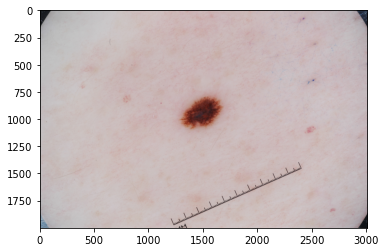

In [11]:
# Load an image and display it

im = plt.imread('fyp2021p3/data/example_image/ISIC_0012099.jpg')
plt.imshow(im)

In [12]:
#A color image is a array with 3 dimensions (x, y, R-G-B color channels) of integers

print(im.shape)
print(im.dtype)

#Other packages might wrap the image in a different class - you are allowed to use those if you want


(2000, 3008, 3)
uint8


[200 176 174]


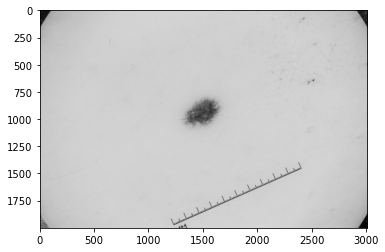

In [19]:

# Get a single RGB value from the blue circle (marker used by dermatologist)
print(im[1500,2000,:])

# Show only the red channel
plt.imshow(im[:,:,0], cmap='gray')



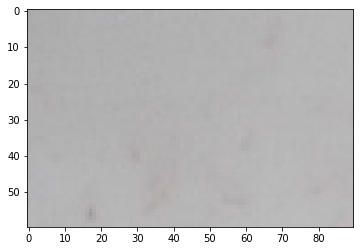

In [21]:
# Display only a part of the image

im_part = im[60:120,130:220,:]
plt.imshow(im_part)



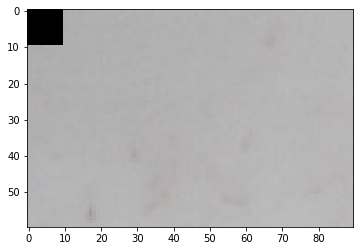

In [22]:
# Modify the image by setting some pixels to black

im_copy = im_part.copy()


im_copy[0:10,0:10,:] = np.tile(0, [10, 10, 3])
plt.imshow(im_copy)


# Explore the segmentation mask

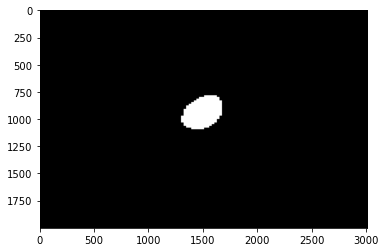

In [23]:
# Load the mask and display it

mask=plt.imread('fyp2021p3/data/example_segmentation/ISIC_0012099_segmentation.png')
plt.imshow(mask, cmap='gray')


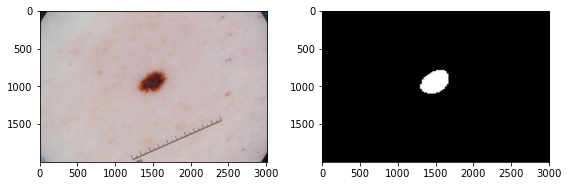

In [25]:
# Show image and mask side by side

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
axes[0].imshow(im)
axes[1].imshow(mask, cmap='gray')
fig.tight_layout()

(3008, 2000)


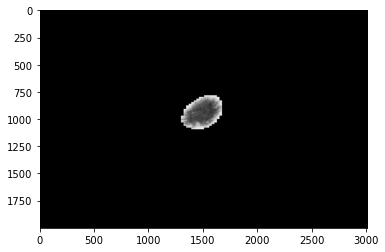

In [17]:
# Show the images overlayed, for this we can use PIL 

#!pip install pillow 
from PIL import Image 

# Load images as Image objects  
img1 = Image.open('fyp2021p3/data/example_image/ISIC_0012099.jpg') 
img2 = Image.open('fyp2021p3/data/example_segmentation/ISIC_0012099_segmentation.png') 
  
# Overlay - more options such as transparency should be available here  
img2.paste(img1, (0,0), mask = img2) 
  
# Display 
img2.show()  # This doesn't actually display an image in Google Colab :(
plt.imshow(img2, cmap='gray')


# Note that this is a single channel image
print(img2.size)          

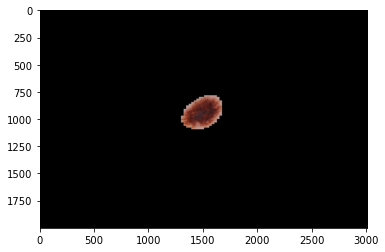

In [26]:
# Alternative: replace the non-lesion pixels

img1 = im.copy()
img1[mask==0] = 0
  
# Display 
plt.imshow(img1)

# You can use any package you prefer, but beware you might need to convert between formats

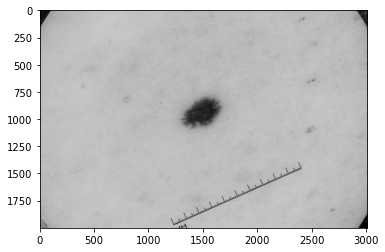

In [27]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

img1 = plt.imread('fyp2021p3/data/example_image/ISIC_0012099.jpg')
gray = rgb2gray(img1)

plt.imshow(gray, cmap='gray')

(array([[1.350e+02, 2.400e+01, 1.000e+00, ..., 1.454e+03, 0.000e+00,
         0.000e+00],
        [1.340e+02, 2.300e+01, 1.000e+00, ..., 1.467e+03, 0.000e+00,
         0.000e+00],
        [1.320e+02, 2.300e+01, 1.000e+00, ..., 1.478e+03, 2.000e+00,
         0.000e+00],
        ...,
        [1.580e+02, 9.500e+01, 2.200e+01, ..., 9.430e+02, 0.000e+00,
         0.000e+00],
        [1.590e+02, 9.600e+01, 2.400e+01, ..., 9.450e+02, 2.000e+00,
         1.000e+00],
        [1.540e+02, 1.060e+02, 1.800e+01, ..., 9.570e+02, 6.000e+00,
         4.000e+00]]),
 array([ 13.1558 ,  37.09855,  61.0413 ,  84.98405, 108.9268 , 132.86955,
        156.8123 , 180.75505, 204.6978 , 228.64055, 252.5833 ]),
 <a list of 3008 BarContainer objects>)

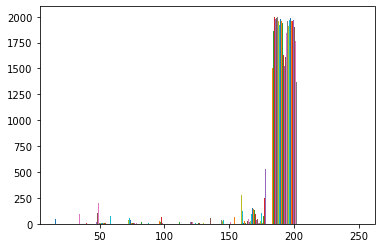

In [28]:
plt.hist(gray)

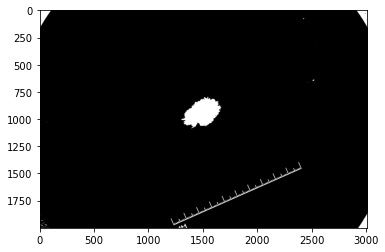

In [29]:
img2 = gray < 120
plt.imshow(img2, cmap='gray')

# Measurements and masks

In [14]:
im = plt.imread('fyp2021p3/data/example_image/ISIC_0012099.jpg')

mask=plt.imread('fyp2021p3/data/example_segmentation/ISIC_0012099_segmentation.png')


In [30]:
# total size of the image

total = mask.shape[0] * mask.shape[1]
total


6016000

In [31]:
# size of mask only

area = np.sum(mask)
area

88455.0

1.4703291223404256


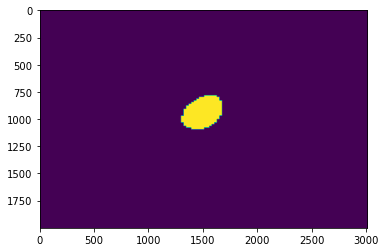

In [32]:
# as percentage

print(area/total*100)
plt.imshow(mask)

## Measurement: width/height

In [40]:
pixels_in_col = np.max(np.sum(mask, axis=0))
pixels_in_row = np.max(np.sum(mask, axis=1))
print("Number of pixels in column is, also known as width \n",pixels_in_col, '\n')

print("Number of pixels in row is, also known as height \n",pixels_in_row)

Number of pixels in column is, also known as width 
 297.0 

Number of pixels in row is, also known as height 
 353.0


## Measurement: diameter at an angle

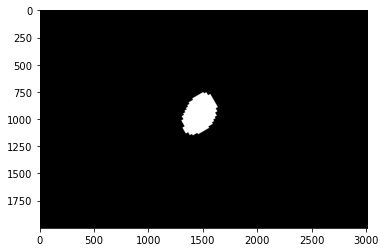

In [42]:
from skimage import transform

rot_im = transform.rotate(mask, 30)
plt.imshow(rot_im, cmap='gray')

# Find perimeter using morphology

In [43]:
from skimage import morphology

#Structural element, that we will use as a "brush" on our mask
struct_el = morphology.disk(20)

print(struct_el)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


88455.0
64490


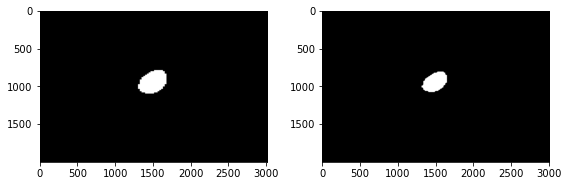

In [45]:
mask_eroded = morphology.binary_erosion(mask, struct_el)

# Show side by side

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
axes[0].imshow(mask, cmap='gray')
axes[1].imshow(mask_eroded, cmap='gray')
fig.tight_layout()

# Verify it's smaller
print(area)
print(np.sum(mask_eroded))

23965.0


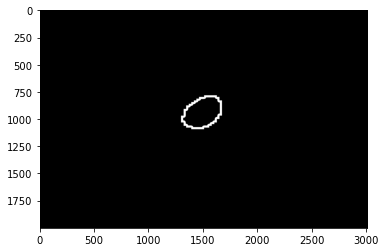

In [46]:
# Subtract the two masks from each other to get the border/perimeter

image_perimeter = mask - mask_eroded

plt.imshow(image_perimeter, cmap='gray') #The perimeter is very thin so it might be difficult to see on the screen

#What is the length? 
print(np.sum(image_perimeter))

# Creating your own mask

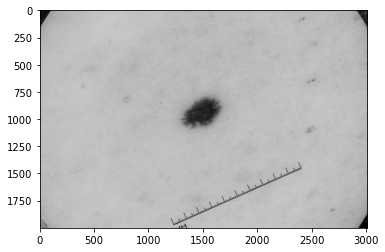

In [47]:
# Work with color image as grayscale

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

gray = rgb2gray(im)
plt.imshow(gray, cmap='gray')



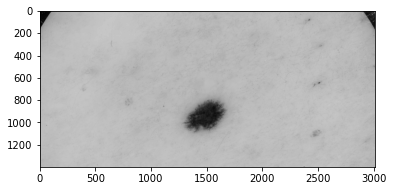

In [49]:
# Let's get rid of the marker
gray2 = gray[0:1400,:]
plt.imshow(gray2, cmap='gray')

mask2 = mask[0:1500,:]


In [ ]:
#Look at intensities of image
plt.hist(gray2)
